<a href="https://colab.research.google.com/github/sujialagar/Rainfall-prediction-mini-project/blob/main/Rainfall_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mounting to drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importing Library

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


Loading Dataset

In [ ]:
Rain = pd.read_csv("/content/drive/MyDrive/Rainfall.csv")

Rain
Rain.head()

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [ ]:
Rain.shape

(21120, 18)

In [ ]:
Rain.dtypes

,0
Unnamed: 0,int64
Station Names,object
YEAR,int64
Month,int64
Max Temp,float64
Min Temp,float64
Rainfall,float64
Relative Humidity,float64
Wind Speed,float64
Cloud Coverage,float64


In [ ]:
Rain.describe()

,Unnamed: 0,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
count,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000,21120.000000
mean,10559.500000,1985.773295,6.500000,33.475129,21.148859,197.529667,79.463163,1.415354,3.478883,6.411131,41933.961364,534711.284017,563482.384432,23.362909,90.448776,12.993182,1985.838295
std,6096.963179,17.604499,3.452134,2.986268,4.968361,239.041031,7.664233,1.040356,2.080403,1.739075,37.076717,145302.997111,159680.561697,1.172647,1.125241,13.519959,17.604533
min,0.000000,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,41858.000000,0.000000,0.000000,20.870000,88.560000,0.000000,1948.010000
25%,5279.750000,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.500000,5.000000,41907.000000,435303.700000,499110.500000,22.640000,89.360000,4.000000,1972.110000
50%,10559.500000,1988.000000,6.500000,33.900000,23.400000,110.000000,81.000000,1.200000,3.300000,6.782857,41941.000000,540098.600000,544954.500000,23.170000,90.390000,7.000000,1988.020000
75%,15839.250000,2001.000000,9.250000,35.500000,25.400000,310.000000,85.000000,1.900000,5.500000,7.800000,41960.000000,650012.100000,683166.000000,24.290000,91.460000,19.000000,2001.030000
max,21119.000000,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.750000,92.260000,63.000000,2013.120000


Checking null values

In [ ]:
Rain.isnull().sum()

,0
Unnamed: 0,0
Station Names,0
YEAR,0
Month,0
Max Temp,0
Min Temp,0
Rainfall,0
Relative Humidity,0
Wind Speed,0
Cloud Coverage,0


Data Cleaning

In [ ]:
Rain = Rain.drop(['X_COR', 'Y_COR'], axis=1)
Rain.shape

(21120, 16)

Detecting Outliers & Removal

In [ ]:
numerical_columns = [
    'Max Temp', 'Min Temp', 'Rainfall', 'Relative Humidity',
    'Wind Speed', 'Cloud Coverage', 'Bright Sunshine', 'LATITUDE', 'LONGITUDE', 'ALT', 'Period'
]
categorical_columns = ['Station Names', 'Season']

quartiles = Rain[numerical_columns].quantile([0.25, 0.75])
q1 = quartiles.loc[0.25]
q3 = quartiles.loc[0.75]
iqr = q3 - q1
threshold = 1.5

outliers = (
    (Rain[numerical_columns] < (q1 - threshold * iqr)) |
    (Rain[numerical_columns] > (q3 + threshold * iqr))
).any(axis=1)

num_outliers = outliers.sum()
print("Number of outliers:", num_outliers)

data_cleaned = Rain[~outliers]
print("Shape of the cleaned dataset:", data_cleaned.shape)

Number of outliers: 2653
Shape of the cleaned dataset: (18467, 18)


In [ ]:
Rain.to_csv('cleaned_rain.csv', index=False)

Eploratory Data Analysis

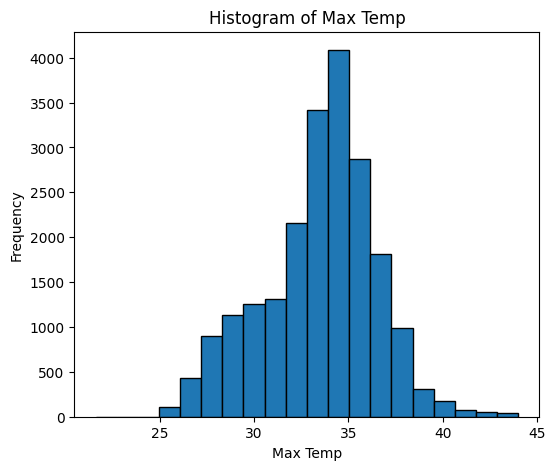

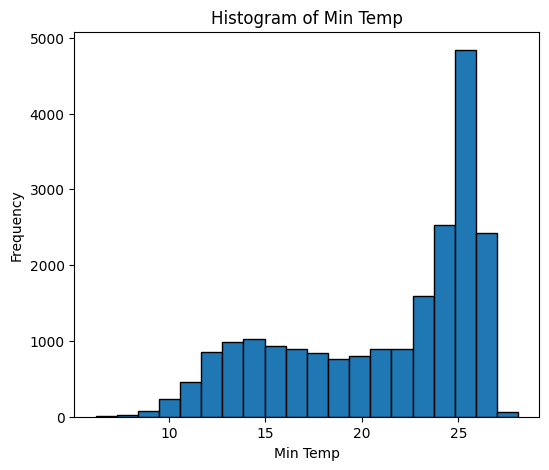

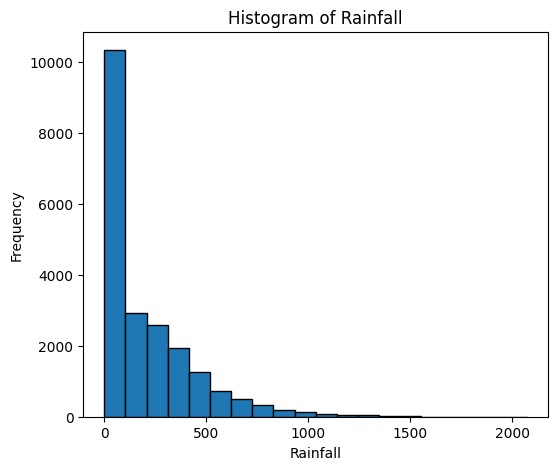

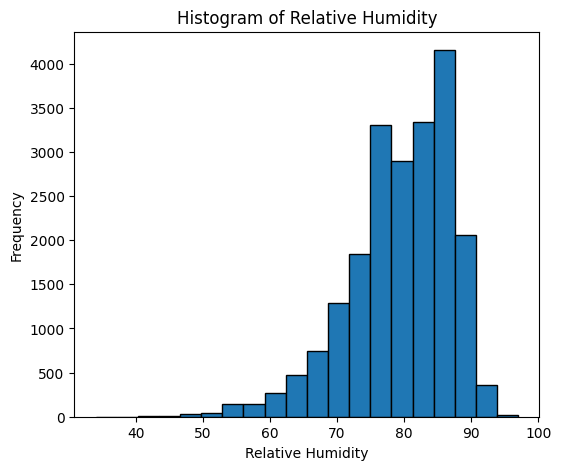

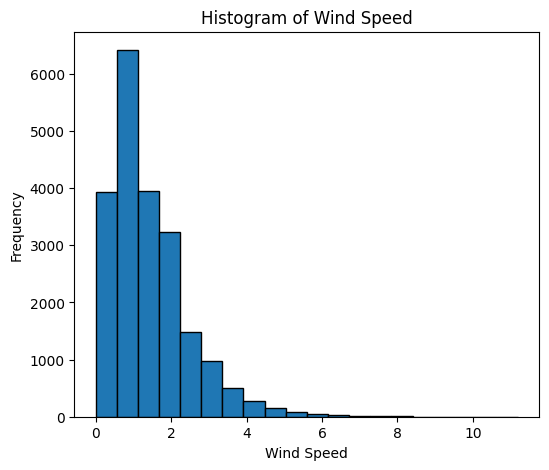

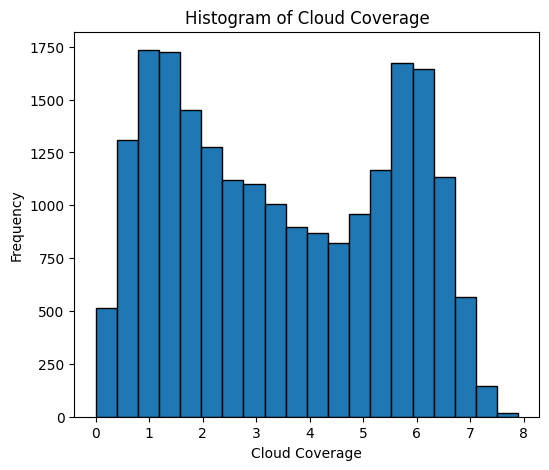

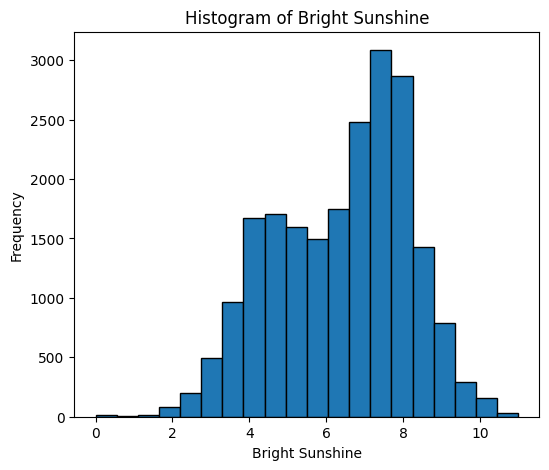

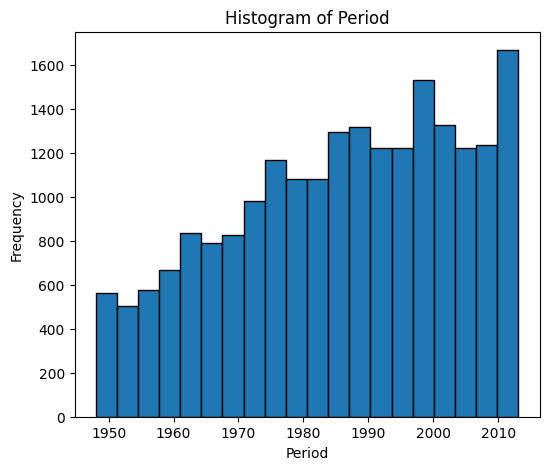

In [ ]:
#Histogram

import pandas as pd
import matplotlib.pyplot as plt

Rain = pd.read_csv('/content/cleaned_rain.csv')

# Create histograms for all numerical columns
numerical_cols = ['Max Temp', 'Min Temp', 'Rainfall', 'Relative Humidity', 'Wind Speed', 'Cloud Coverage', 'Bright Sunshine', 'Period']
for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    plt.hist(Rain[col], bins=20, edgecolor='k')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

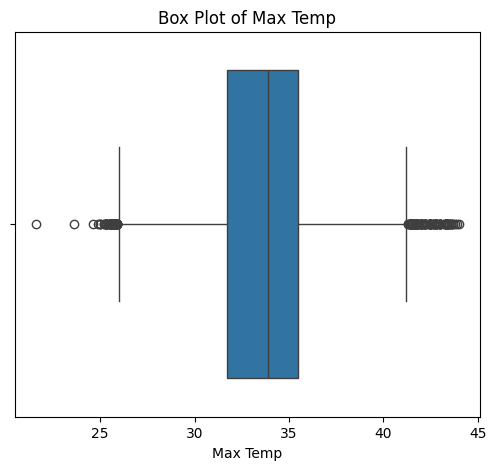

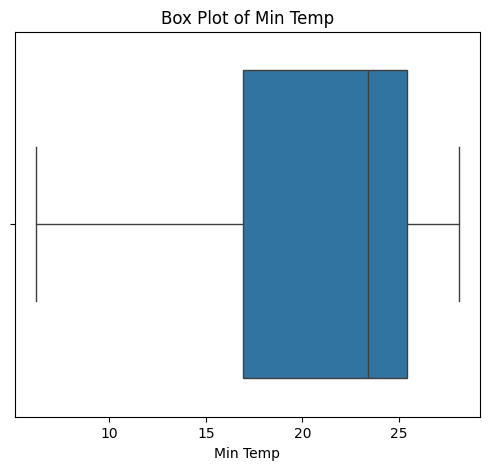

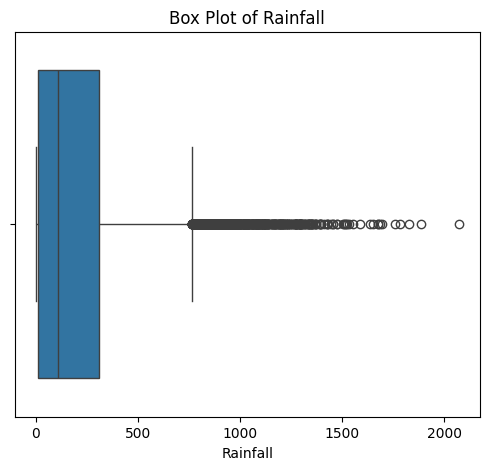

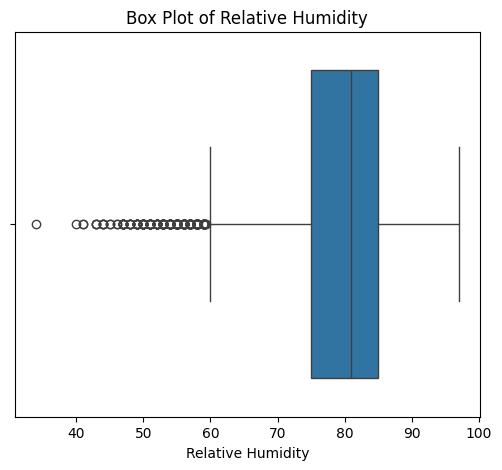

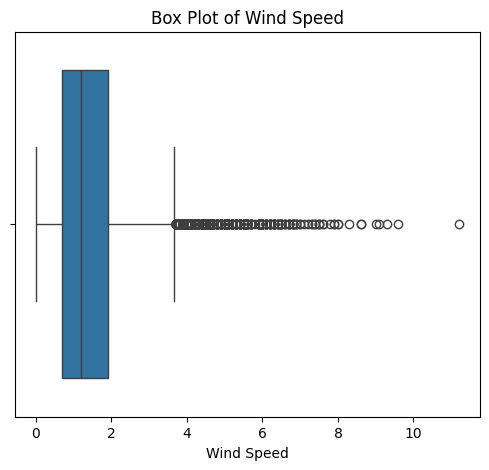

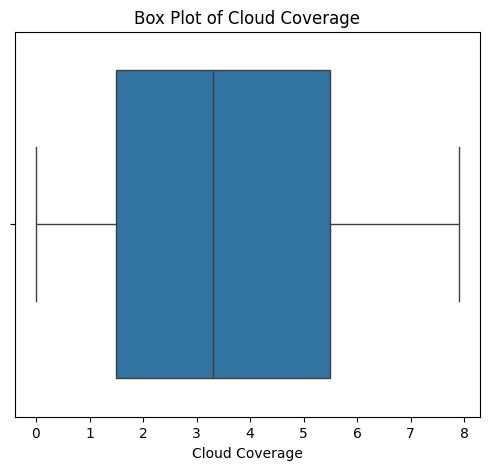

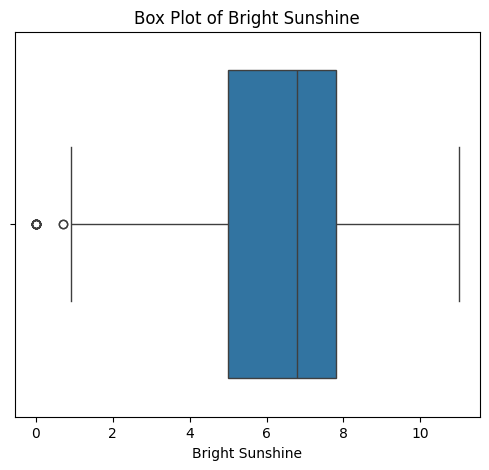

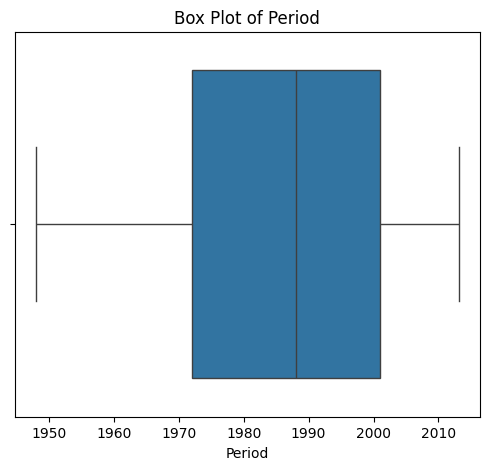

In [ ]:
#Box plot

numerical_cols = ['Max Temp', 'Min Temp', 'Rainfall', 'Relative Humidity', 'Wind Speed', 'Cloud Coverage', 'Bright Sunshine', 'Period']
for col in numerical_cols:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=Rain[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

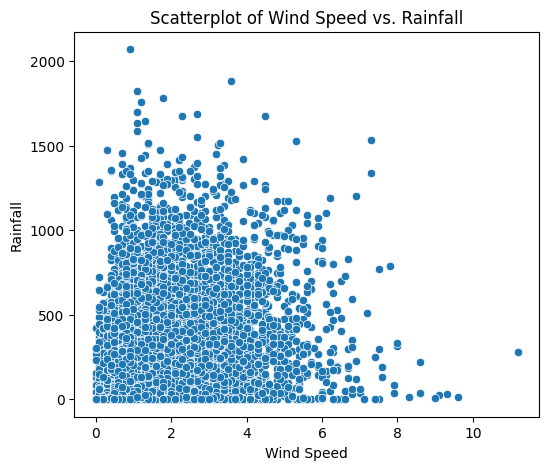

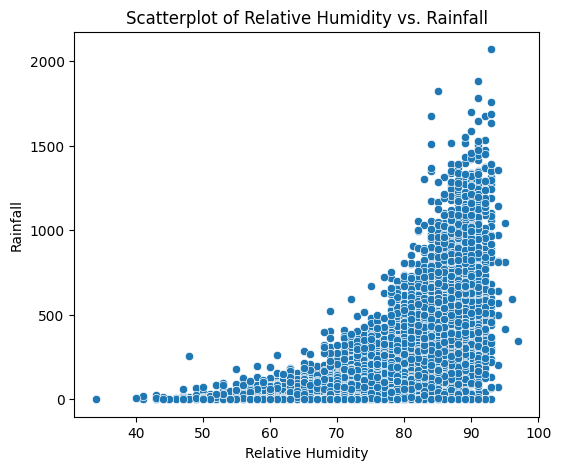

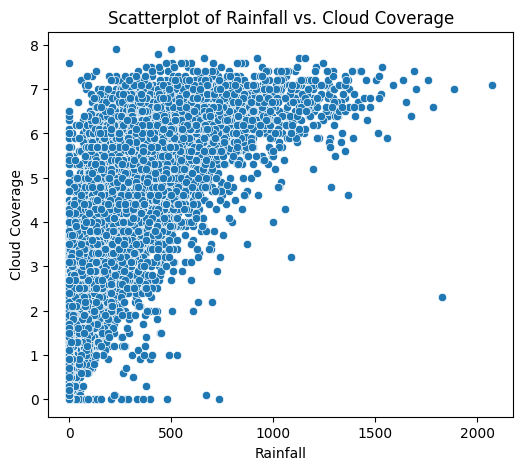

In [ ]:
#scatterplot
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Wind Speed', y='Rainfall', data=Rain)
plt.title('Scatterplot of Wind Speed vs. Rainfall')
plt.xlabel('Wind Speed')
plt.ylabel('Rainfall')
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x='Relative Humidity', y='Rainfall', data=Rain)
plt.title('Scatterplot of Relative Humidity vs. Rainfall')
plt.xlabel('Relative Humidity')
plt.ylabel('Rainfall')
plt.show()

plt.figure(figsize=(6, 5))
sns.scatterplot(x='Rainfall', y='Cloud Coverage', data=Rain)
plt.title('Scatterplot of Rainfall vs. Cloud Coverage')
plt.xlabel('Rainfall')
plt.ylabel('Cloud Coverage')
plt.show()

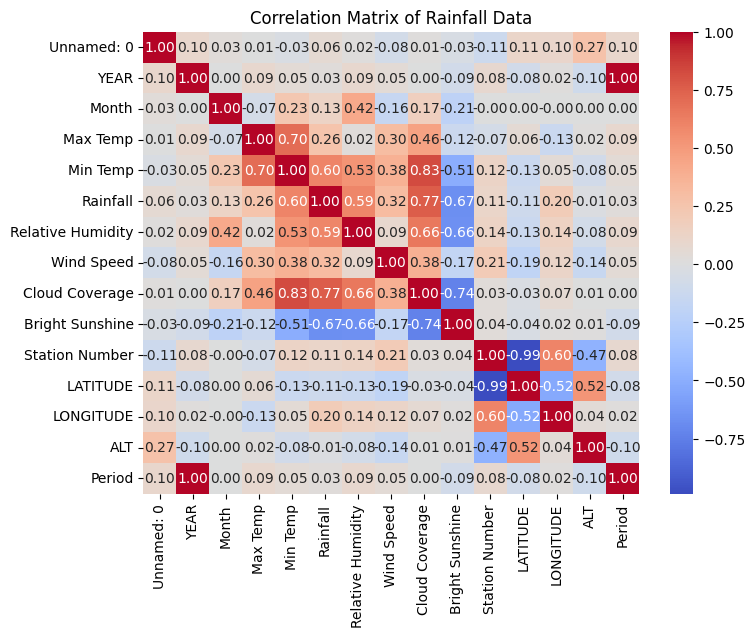

In [ ]:
#correlation matrix
numerical_rain = Rain.select_dtypes(include=['number'])
correlation_matrix = numerical_rain.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Rainfall Data')
plt.show()

Feature Engineering

In [ ]:
# splitting month and year to season coding

def map_month_to_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  elif month in [9, 10, 11]:
    return 'Autumn'
  else:
    return 'Unknown'

Rain['Season'] = Rain['Month'].apply(map_month_to_season)
Rain.head()

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Season
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01,Winter
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01,Winter
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01,Winter
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01,Winter
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01,Winter


In [ ]:
# display the spring seasons in rows

Rain[Rain['Season'] == 'Spring']


,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,LATITUDE,LONGITUDE,ALT,Period,Season
130,130,Barisal,1949,3,36.7,20.2,8.0,59.0,1.085185,1.5,8.131915,41950,22.70,90.36,4,1949.03,Spring
131,131,Barisal,1950,3,36.1,20.5,13.0,70.0,1.085185,2.9,8.131915,41950,22.70,90.36,4,1950.03,Spring
132,132,Barisal,1951,3,35.6,21.5,67.0,70.0,1.085185,4.0,8.131915,41950,22.70,90.36,4,1951.03,Spring
133,133,Barisal,1952,3,33.3,20.2,33.0,73.0,1.085185,2.4,8.131915,41950,22.70,90.36,4,1952.03,Spring
134,134,Barisal,1953,3,35.0,22.9,3.0,78.0,1.085185,3.1,8.131915,41950,22.70,90.36,4,1953.03,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20856,20856,Teknaf,2009,5,35.3,25.6,313.0,79.0,3.600000,4.1,8.000000,41998,20.87,92.26,4,2009.05,Spring
20857,20857,Teknaf,2010,5,35.5,26.4,492.0,86.0,3.000000,3.9,6.000000,41998,20.87,92.26,4,2010.05,Spring
20858,20858,Teknaf,2011,5,33.6,25.0,312.0,83.0,2.600000,4.3,6.400000,41998,20.87,92.26,4,2011.05,Spring
20859,20859,Teknaf,2012,5,34.1,26.0,154.0,83.0,2.300000,3.3,8.200000,41998,20.87,92.26,4,2012.05,Spring


The season with the highest rainfall is: Summer


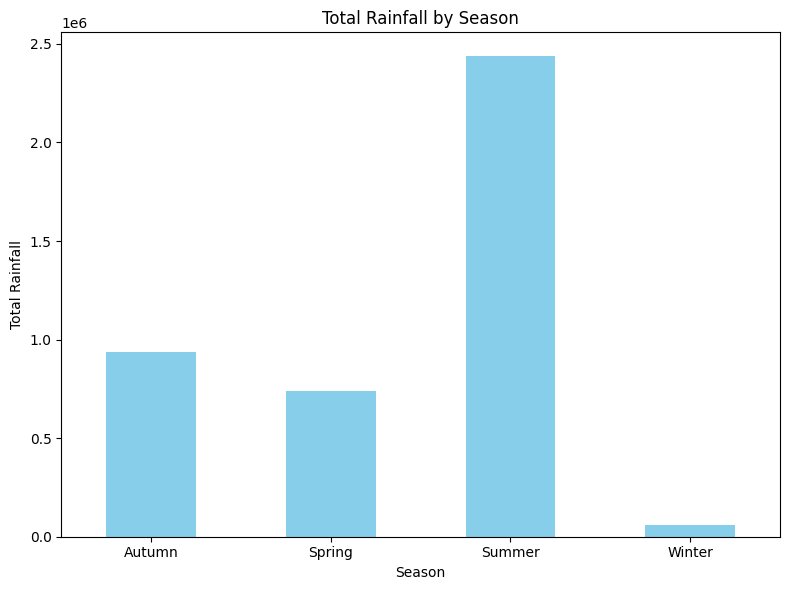

In [ ]:
#season which received highest rainfall throughout the year

seasonal_rainfall = Rain.groupby('Season')['Rainfall'].sum()

highest_rainfall_season = seasonal_rainfall.idxmax()
print(f"The season with the highest rainfall is: {highest_rainfall_season}")

# Create a bar plot
plt.figure(figsize=(8, 6))
seasonal_rainfall.plot(kind='bar', color='skyblue')
plt.title('Total Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Total Rainfall')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# highest rainfall seasons per year
import plotly.express as px

highest_rainfall_seasons = Rain.loc[Rain.groupby('YEAR')['Rainfall'].idxmax()]

fig = px.bar(highest_rainfall_seasons, x='YEAR', y='Rainfall', color='Season',
             labels={'YEAR': 'Year', 'Rainfall': 'Highest Rainfall', 'Seasons': 'Seasons'},
             title='Highest Rainfall per Year by Season')
fig.show()

In [ ]:
#the highest rainfall across the years by selecting top 5 station names

import plotly.express as px

station_year_rainfall = Rain.groupby(['Station Names', 'YEAR'])['Rainfall'].sum().reset_index()
station_total_rainfall = station_year_rainfall.groupby('Station Names')['Rainfall'].sum()

top_5_stations = station_total_rainfall.nlargest(5)
top_stations_df = Rain[Rain['Station Names'].isin(top_5_stations.index)]

# Create the Plotly bar chart
fig = px.bar(
    top_stations_df.groupby(['Station Names', 'YEAR'])['Rainfall'].sum().reset_index(),
    x="Station Names",
    y="Rainfall",
    color="YEAR",
    title="Top 5 Stations with Highest Rainfall Across Years",
    labels={'Rainfall': 'Total Rainfall', 'Station Names': 'Station Name', "YEAR": "Year"}
)

fig.show()

In [ ]:
#Regions with highest rainfall year wise

Data = pd.read_csv('/content/cleaned_rain.csv')

station_max_rainfall = Rain.groupby(['YEAR', 'Station Names'])['Rainfall'].max().reset_index()
highest_rainfall_stations = station_max_rainfall.loc[station_max_rainfall.groupby('YEAR')['Rainfall'].idxmax()]

highest_rainfall_stations[['YEAR', 'Station Names', 'Rainfall']]



,YEAR,Station Names,Rainfall
1,1948,Comilla,1045.0
14,1949,Cox's Bazar,960.0
24,1950,Chittagong (IAP-Patenga),1676.0
37,1951,Comilla,857.0
51,1952,Cox's Bazar,1266.0
...,...,...,...
1620,2009,Teknaf,1454.0
1654,2010,Teknaf,1089.0
1663,2011,Cox's Bazar,1226.0
1708,2012,Kutubdia,1688.0


In [ ]:
# rainfall density in each season in each station name of a year

station_season_rainfall = Rain.groupby(['YEAR', 'Station Names', 'Season'])['Rainfall'].sum().reset_index()
station_season_rainfall


,YEAR,Station Names,Season,Rainfall
0,1948,Bogra,Autumn,427.921875
1,1948,Bogra,Spring,274.343750
2,1948,Bogra,Summer,986.312500
3,1948,Bogra,Winter,25.671875
4,1948,Comilla,Autumn,621.000000
...,...,...,...,...
7035,2013,Tangail,Winter,15.000000
7036,2013,Teknaf,Autumn,600.000000
7037,2013,Teknaf,Spring,787.000000
7038,2013,Teknaf,Summer,2799.000000


In [ ]:
#the seasons with the highest rainfall
import plotly.graph_objects as go

year_season_region_rainfall = Rain.groupby(['YEAR', 'Season', 'Station Names'])['Rainfall'].sum().reset_index()

max_rainfall_seasons = year_season_region_rainfall.groupby(['YEAR'])['Rainfall'].idxmax()
seasons_with_max_rainfall = year_season_region_rainfall.loc[max_rainfall_seasons]
fig = go.Figure()

for season in Rain['Season'].unique():
    season_data = seasons_with_max_rainfall[seasons_with_max_rainfall['Season'] == season]
    fig.add_trace(go.Bar(
        x=season_data['YEAR'],
        y=season_data['Rainfall'],
        name=season,
        text=season_data['Station Names'],
        hovertemplate='Year: %{x}<br>Rainfall: %{y}<br>Location: %{text}<extra></extra>'
    ))

fig.update_layout(
    title='Seasons with Maximum Rainfall Per Year',
    xaxis_title='Year',
    yaxis_title='Total Rainfall (mm)',
    barmode='group',
    legend_title='Season'
)
fig.show()

Linear Regression

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = '/content/cleaned_rain.csv'
rainfall_data = pd.read_csv(file_path)

# Extracting relevant features
X = rainfall_data[['Cloud Coverage']]  # Predictor
y = rainfall_data['Rainfall']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



Mean Squared Error (MSE): 23489.542282808346
R² Score: 0.5874270435290756


<ipython-input-10-7b6cecf22aa2>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Fit')


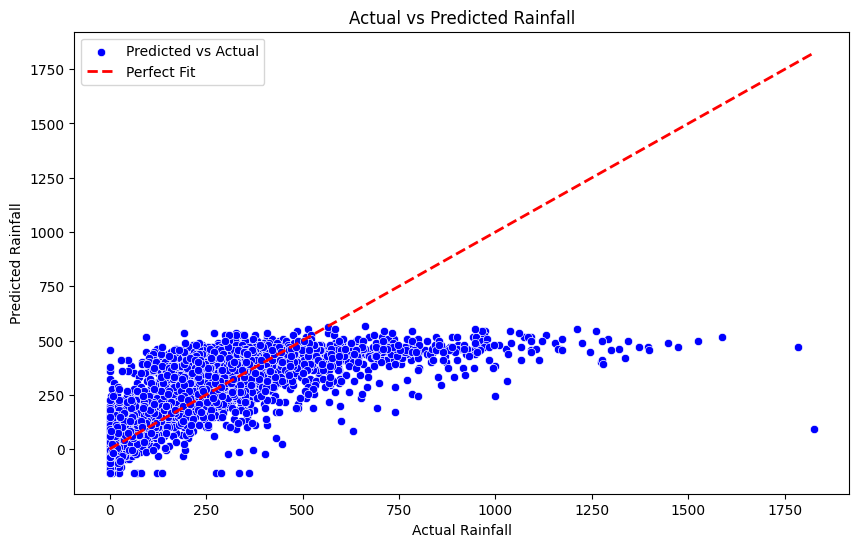

In [ ]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')
plt.legend()
plt.show()

Random Forest Regressor

In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
file_path = '/content/cleaned_rain.csv'
rainfall_data = pd.read_csv(file_path)

# Extracting relevant features
X = rainfall_data[['Cloud Coverage','YEAR','Month','Max Temp','Min Temp','Relative Humidity','Wind Speed']]  # Predictor
y = rainfall_data['Rainfall']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")



Mean Squared Error (MSE): 13935.871875252813
R² Score: 0.7552287826067569


In [ ]:
# Check feature importance for Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Display feature importances
for name, importance in zip(feature_names, feature_importances):
    print(f"Feature: {name}, Importance: {importance}")

Feature: Cloud Coverage, Importance: 0.6295292830741389
Feature: YEAR, Importance: 0.02258136232629038
Feature: Month, Importance: 0.023440071432649787
Feature: Max Temp, Importance: 0.03940813017013128
Feature: Min Temp, Importance: 0.07185481760826698
Feature: Relative Humidity, Importance: 0.059821944866266116
Feature: Wind Speed, Importance: 0.041241483591714534
Feature: Period, Importance: 0.03110049222168103
Feature: ALT, Importance: 0.02914587030147538
Feature: Bright Sunshine, Importance: 0.051876544407385684


In [ ]:
# save the model and download as random_forest_model.pkl

import warnings
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the dataset
file_path = '/content/cleaned_rain.csv'
rainfall_data = pd.read_csv(file_path)

# Feature selection
X = rainfall_data[['Cloud Coverage', 'YEAR', 'Month', 'Max Temp', 'Min Temp', 'Relative Humidity', 'Wind Speed']]
y = rainfall_data['Rainfall']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Save the model
joblib.dump(rf_model, '/content/drive/MyDrive/rf_model.pkl')

# Load the trained model
rf_model = joblib.load('/content/drive/MyDrive/rf_model.pkl')

In [ ]:
# Select a few samples from the test set for prediction
sample_data = X_test[:5]

# Use the trained Random Forest model to predict rainfall
predicted_values = rf_model.predict(sample_data)

# Feature names
feature_names = sample_data.columns

# Display the predictions in a readable and neat format
print("\nSample Rainfall Predictions (in mm):")
print("=" * 80)
print(f"{'Sample #':<10} {'Feature Name':<50} {'Predicted Rainfall (mm)':>20}")
print("=" * 80)

for i, value in enumerate(predicted_values):
    print(f"\nSample {i + 1}:")
    print("-" * 80)
    for feature, feature_value in zip(feature_names, sample_data.iloc[i].values):
        formatted_value = f"{feature_value:.2f}" if isinstance(feature_value, float) else str(feature_value)
        print(f"{feature:<30}: {formatted_value:<15}")
    print(f"\n{'Predicted Rainfall':<30}: {value:.2f} mm")
    print("-" * 80)



Sample Rainfall Predictions (in mm):
Sample #   Feature Name                                       Predicted Rainfall (mm)

Sample 1:
--------------------------------------------------------------------------------
Cloud Coverage                : 2.70           
YEAR                          : 1965.00        
Month                         : 4.00           
Max Temp                      : 37.20          
Min Temp                      : 22.90          
Relative Humidity             : 67.00          
Wind Speed                    : 1.50           

Predicted Rainfall            : 67.73 mm
--------------------------------------------------------------------------------

Sample 2:
--------------------------------------------------------------------------------
Cloud Coverage                : 4.70           
YEAR                          : 2013.00        
Month                         : 10.00          
Max Temp                      : 34.20          
Min Temp                      : 24.40    

In [ ]:
import numpy as np
import pandas as pd
from joblib import load

# Load the pre-trained Random Forest model
rf_model = load('/content/drive/MyDrive/rf_model.pkl')

feature_names = [
    'Cloud Coverage',
    'YEAR',
    'Month',
    'Max Temp',
    'Min Temp',
    'Relative Humidity',
    'Wind Speed'
]

# Prompt the user to input feature values
print("\nEnter the values for the following features:")
user_input = []
for feature in feature_names:
    value = float(input(f"{feature}: "))
    user_input.append(value)

input_data = pd.DataFrame([user_input], columns=feature_names)

processed_input = input_data

# Predict rainfall using the Random Forest model
predicted_rainfall = rf_model.predict(processed_input)

# Display the prediction results
print("\nPredicted Rainfall (in mm):")
print("=" * 80)
for feature, value in zip(feature_names, user_input):
    print(f"{feature:<30}: {value:.2f}")
print(f"\n{'Predicted Rainfall':<30}: {predicted_rainfall[0]:.2f} mm")
print("=" * 80)


Enter the values for the following features:
